<a href="https://colab.research.google.com/github/Ayakhaled200/EDA/blob/main/Aya_Khaled___Bank_Marketing_Dataset_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
from io import BytesIO

# Importing the Data


In [ ]:
#Very Simple trick :D
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
# Send a request to the URL to get the content
response = requests.get(url)

# Extract the contents of the zip file
with zipfile.ZipFile(BytesIO(response.content), 'r') as z:
    z.extractall()

# Load the dataset into a DataFrame
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [ ]:
df.isnull().sum().sum()  #no nulls


0

## Removing duplicates
We can use .drop_duplicates()

In [ ]:
# df[df.duplicated()] #there are  duplicates
df.drop_duplicates() #remove duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Quick View for the the data
We can use .describe() and .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Converting data types
Using .astype()

In [ ]:
#no need

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.
#### Box plots
- Using .boxplot() in pandas to visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

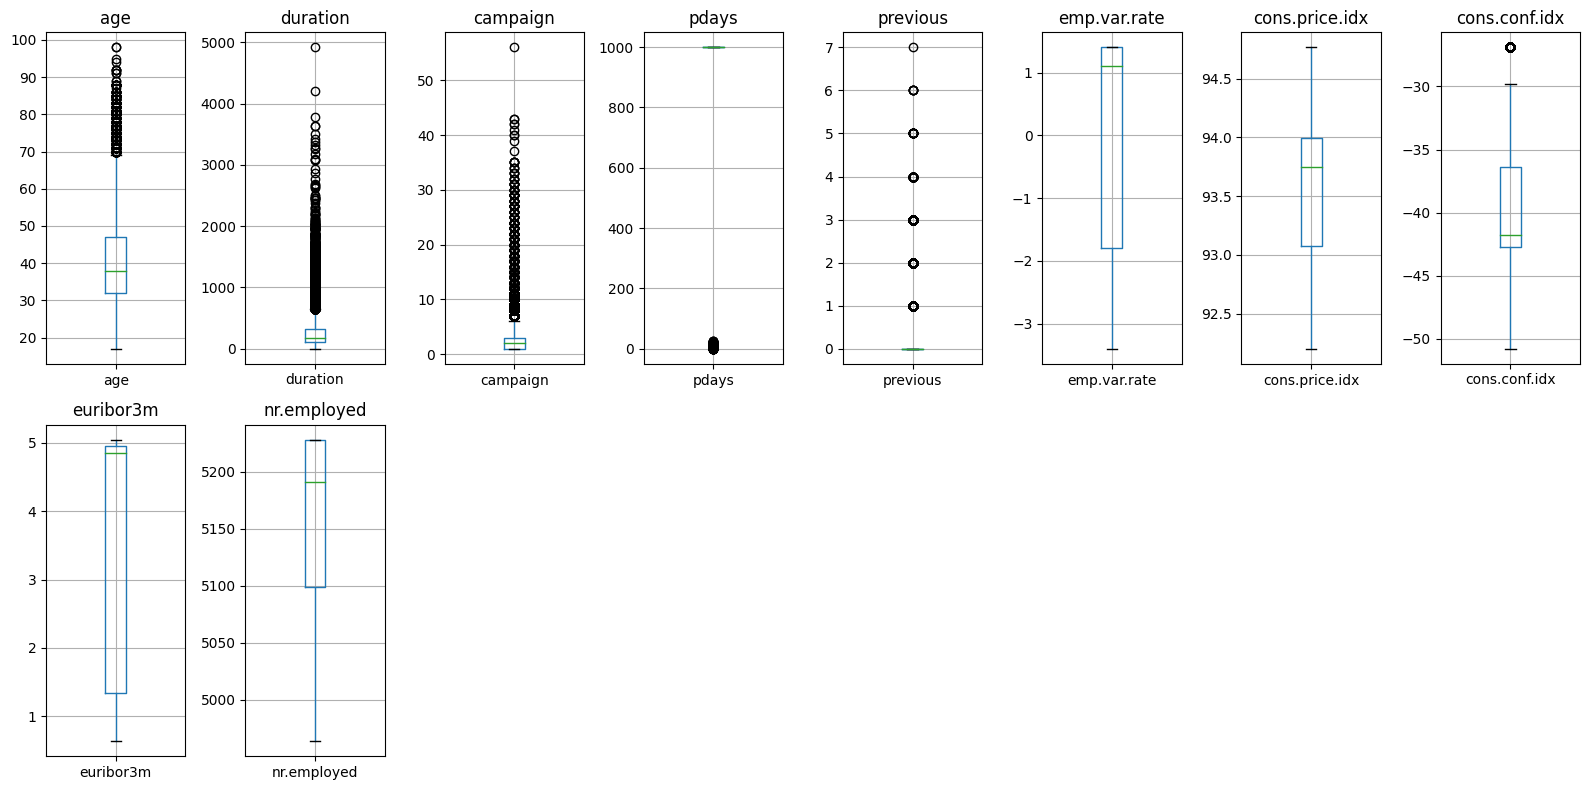

In [ ]:
#box plots
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,8 , i)
    df.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

# Show the boxplots
plt.show()

## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [ ]:
#no need

# Data Preprocessing


## Dropping unnecessary columns
 Use .drop() in pandas.

In [ ]:
df.drop(["Age","duration", "campaign"], axis=1, inplace=True)

## Encoding categorical variables


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
# Encode the 'Sex' column and assign the result directly to the original DataFrame using .loc
df.loc[:, 'y'] = label_encoder.fit_transform(df['y'])
df

<ipython-input-18-6345912f914c>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'y'] = label_encoder.fit_transform(df['y'])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

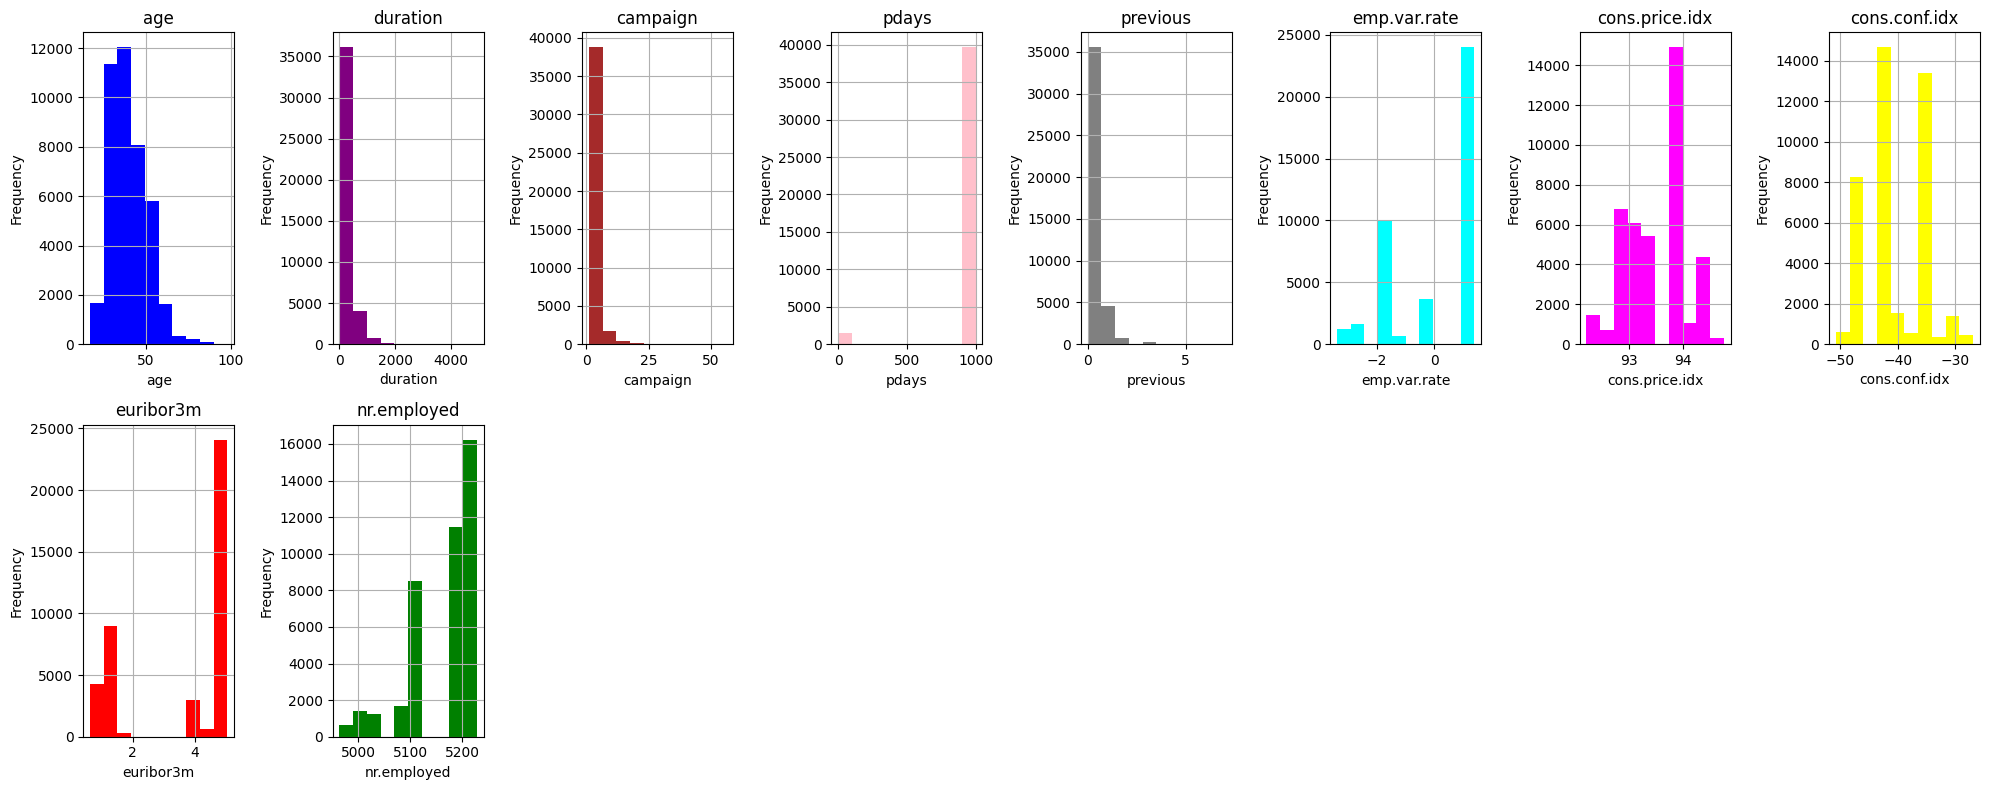

In [ ]:
#histogram
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for numerical columns with different colors
plt.figure(figsize=(20, 8))
colors = ['blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow','red', 'green', 'yello', 'orange', 'black']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df[col].hist(color=colors[i-1])  # Use a different color for each histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

# Show the histograms
plt.show()

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

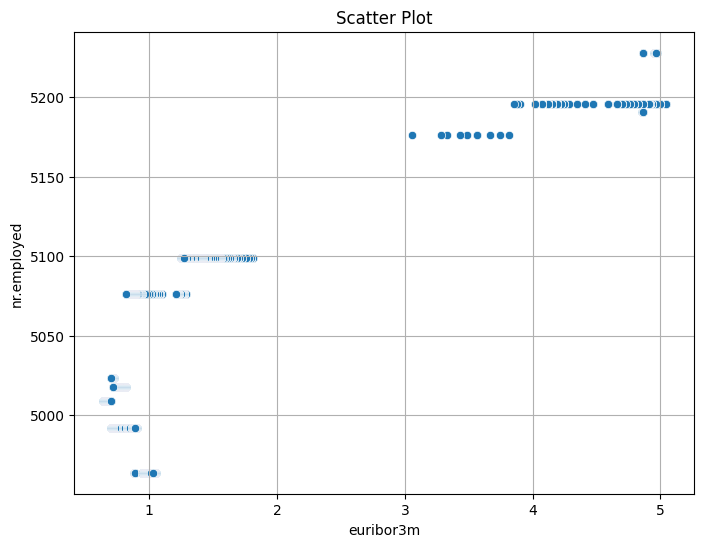

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='euribor3m', y='nr.employed')
plt.xlabel('euribor3m')
plt.ylabel('nr.employed')             #strong +ve corralation
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

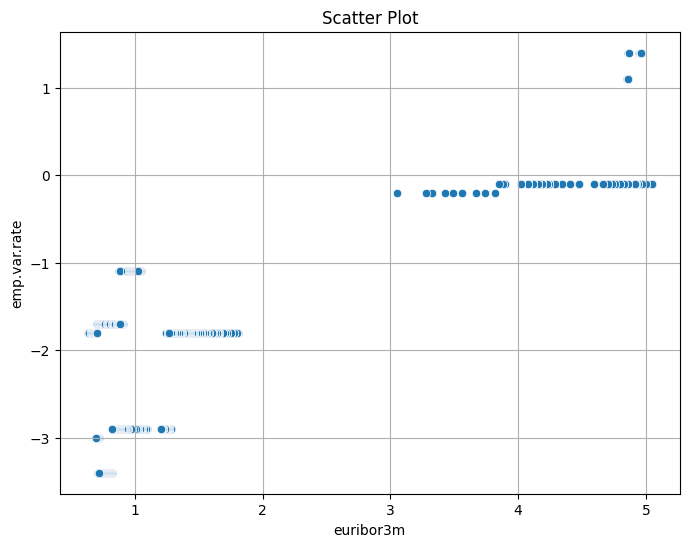

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='euribor3m', y='emp.var.rate')
plt.xlabel('euribor3m')
plt.ylabel('emp.var.rate')             #strong +ve corralation
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

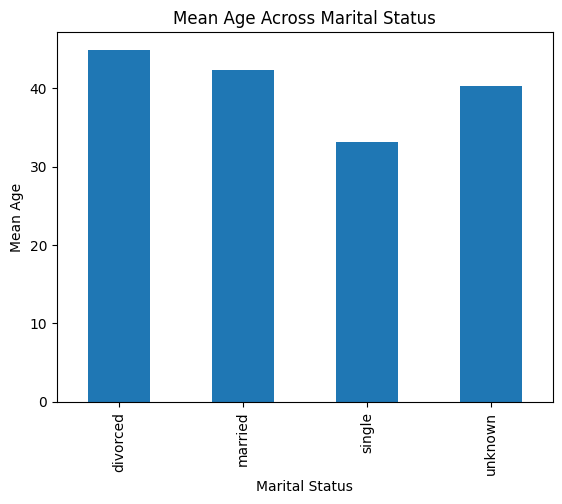

In [ ]:
mean_values = df.groupby('marital')['age'].mean()

# Create bar plot
mean_values.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Mean Age')
plt.title('Mean Age Across Marital Status')
plt.show()

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

<ipython-input-17-6e8b87d90e33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


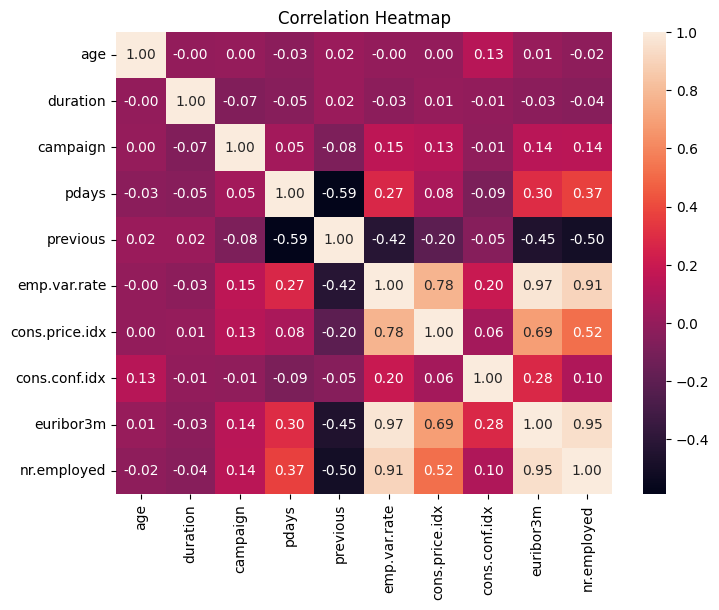

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()